In [1]:
from pathlib import Path
import pickle
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/tmp/ipykernel_984958/708736559.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
magnetoptimizer_path = Path().resolve().parent.parent.parent / "magnetoptimiser"
model_dir_path = magnetoptimizer_path / "src" / "magnetoptimiser" / "models_trained" / "dipole_hshaped" / "v001"

In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.output_layer = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.layer2(x)
        x = self.relu2(x)
        x = self.output_layer(x)
        return x

In [4]:
device = torch.device('cpu')
model = NeuralNetwork(40, 256, 33)
model.load_state_dict(torch.load(model_dir_path / "model_trained.pth",device))
scaler_x = pickle.load(open(model_dir_path / "scaler_x.pkl","rb"))
scaler_y = pickle.load(open(model_dir_path / "scaler_y.pkl","rb"))

/home/max/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.2 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [5]:
df = pd.read_csv(magnetoptimizer_path / "src" / "magnetoptimiser"/ "data" / "hdipole_gfr_dataset_00k-30k.csv")
index_dict = {col:i for i,col in enumerate(list(df.columns)[40:])}
index_dict

{'B0': 0,
 'gfr_x_1e-7': 1,
 'gfr_x_2e-7': 2,
 'gfr_x_5e-7': 3,
 'gfr_x_1e-6': 4,
 'gfr_x_2e-6': 5,
 'gfr_x_5e-6': 6,
 'gfr_x_1e-5': 7,
 'gfr_x_2e-5': 8,
 'gfr_x_5e-5': 9,
 'gfr_x_1e-4': 10,
 'gfr_x_2e-4': 11,
 'gfr_x_5e-4': 12,
 'gfr_x_1e-3': 13,
 'gfr_x_2e-3': 14,
 'gfr_x_5e-3': 15,
 'gfr_x_1e-2': 16,
 'gfr_y_1e-7': 17,
 'gfr_y_2e-7': 18,
 'gfr_y_5e-7': 19,
 'gfr_y_1e-6': 20,
 'gfr_y_2e-6': 21,
 'gfr_y_5e-6': 22,
 'gfr_y_1e-5': 23,
 'gfr_y_2e-5': 24,
 'gfr_y_5e-5': 25,
 'gfr_y_1e-4': 26,
 'gfr_y_2e-4': 27,
 'gfr_y_5e-4': 28,
 'gfr_y_1e-3': 29,
 'gfr_y_2e-3': 30,
 'gfr_y_5e-3': 31,
 'gfr_y_1e-2': 32}

In [6]:
with pd.option_context('display.max_columns', None): 
    display(df[1:2])


,Unnamed: 0,name,gfr_x,gfr_y,gfr_margin,maxCurrentDensity,fieldTolerance,aper_x,aper_y,aper_x_poleoverhang,aper_y_distFromCoil,aper_x_tapering,aper_x_taperingstop,B_design,B_design_margin,B_real,coil_width,coil_height,yoke_x,yoke_y,maxBmaterial,shims,shape,fillfactor,windings,symmetry,w,w_leg,totalCurrent,totalCurrentMax,coilAreaTotal,coilWeightTotal,coilVolumeTotal,coolingRequirementMax,length,material_coil,material_yoke,yokeAreaTotal,yokeWeightTotal,yokeVolumeTotal,B0,gfr_x_1e-7,gfr_x_2e-7,gfr_x_5e-7,gfr_x_1e-6,gfr_x_2e-6,gfr_x_5e-6,gfr_x_1e-5,gfr_x_2e-5,gfr_x_5e-5,gfr_x_1e-4,gfr_x_2e-4,gfr_x_5e-4,gfr_x_1e-3,gfr_x_2e-3,gfr_x_5e-3,gfr_x_1e-2,gfr_y_1e-7,gfr_y_2e-7,gfr_y_5e-7,gfr_y_1e-6,gfr_y_2e-6,gfr_y_5e-6,gfr_y_1e-5,gfr_y_2e-5,gfr_y_5e-5,gfr_y_1e-4,gfr_y_2e-4,gfr_y_5e-4,gfr_y_1e-3,gfr_y_2e-3,gfr_y_5e-3,gfr_y_1e-2
1,1,1,0.01,0.01,0.015,2.0,0.0001,0.025,0.025,0.030197,0.0025,0.00302,100.0,0.4,20,0.08,0.079788,0.039894,0.281237,0.140016,2.15,False,H,75.0,1,reflectxydipole,0.085393,0.015114,795.774715,4774.64829,0.012731,0.114074,0.012731,NaN,1.0,Copper,Pure Iron,0.019316,0.152094,0.019316,0.079589,0.000956,0.00141,0.002184,0.003147,0.004374,0.006836,0.009385,0.012796,0.018276,0.023159,0.028315,0.035353,0.0407,0.046304,0.053487,0.059217,0.001059,0.001405,0.002213,0.003188,0.004433,0.006996,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01


In [7]:
tuple_of_interest = (index_dict["B0"],index_dict["gfr_x_5e-3"],index_dict["gfr_x_5e-3"])

dummy_input = torch.ones((1,40), requires_grad=True)
optim = torch.optim.Adam([dummy_input])

target = torch.zeros(1,33)
target[0,tuple_of_interest[0]] = 0.079589
target[0,tuple_of_interest[1]] = 0.053487
target[0,tuple_of_interest[2]] = 0.01

target = torch.tensor(scaler_y.transform(target)).float()

def create_loss_function(tuple_of_interest):
    mask = torch.zeros(1,33)
    for i in tuple_of_interest:
        mask[0,i] = 1
    mse = torch.nn.MSELoss()
    def instanciated_loss_function(x,y):
        return mse(x*mask,y*mask)
    return instanciated_loss_function

loss_fun = create_loss_function(tuple_of_interest)
loss_hist= []

model.train()
epochs = 10000
for e in range(epochs):
    pred = model(dummy_input)
    optim.zero_grad()
    loss = loss_fun(pred, target)
    loss_hist.append(loss.detach().item())
    loss.backward()
    optim.step()
    #projection
    with torch.no_grad():
        # clamp can have different lower and upper bounds for different columns : https://stackoverflow.com/questions/54738045/column-dependent-bounds-in-torch-clamp
        dummy_input.clamp_(min=0)

output = scaler_x.inverse_transform(dummy_input.detach().numpy())[0]
print(f"final loss: {loss.item()}")
print(output)


final loss: 5.922308332628745e-08
[1.6632022e-01 3.6852917e-01 1.5000000e-02 5.5000000e+00 1.6316980e-02
 1.8132022e-01 3.8898385e-01 1.9608586e-01 3.6962233e-02 1.7695498e-02
 1.0673973e+02 1.2911718e+00 2.2334171e+01 8.3926165e-01 6.1580443e-01
 3.6132324e-01 2.3211281e+00 8.1072372e-01 2.1500001e+00 7.8364494e+01
 1.3886035e+01 4.6241820e-01 2.4500163e-01 3.6330215e+04 3.2560784e+05
 2.1302040e-01 8.1461102e-01 2.4091627e-01 2.6672063e+00 6.4214058e+00
 5.8048775e+01 1.1854306e+00 6.2067056e+00 6.9182997e+00 2.0149875e+00
 4.9098701e+00 1.0000000e+00 2.0833334e-02 4.3750000e-01 5.4166669e-01]


In [8]:
readable = [f"{val.item():.3f}" for val in output]
readable_df = pd.DataFrame([readable],columns=list(df.columns)[:40])
with pd.option_context('display.max_columns', None): 
    display(readable_df)

,Unnamed: 0,name,gfr_x,gfr_y,gfr_margin,maxCurrentDensity,fieldTolerance,aper_x,aper_y,aper_x_poleoverhang,aper_y_distFromCoil,aper_x_tapering,aper_x_taperingstop,B_design,B_design_margin,B_real,coil_width,coil_height,yoke_x,yoke_y,maxBmaterial,shims,shape,fillfactor,windings,symmetry,w,w_leg,totalCurrent,totalCurrentMax,coilAreaTotal,coilWeightTotal,coilVolumeTotal,coolingRequirementMax,length,material_coil,material_yoke,yokeAreaTotal,yokeWeightTotal,yokeVolumeTotal
0,0.166,0.369,0.015,5.500,0.016,0.181,0.389,0.196,0.037,0.018,106.740,1.291,22.334,0.839,0.616,0.361,2.321,0.811,2.150,78.364,13.886,0.462,0.245,36330.215,325607.844,0.213,0.815,0.241,2.667,6.421,58.049,1.185,6.207,6.918,2.015,4.910,1.000,0.021,0.438,0.542


<Axes: >

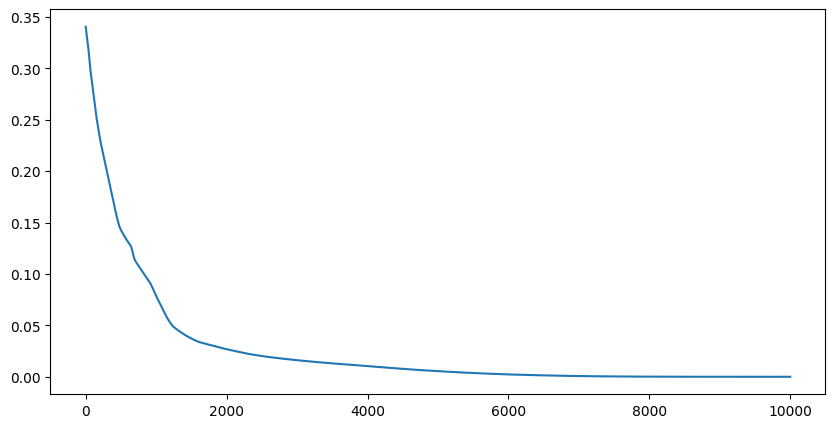

In [9]:
fig,axes = plt.subplots(1,1,figsize=(10,5))
idxs = np.arange(len(loss_hist))
sns.lineplot(ax=axes,x=idxs,y=loss_hist)